In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy import stats
from datetime import datetime

sns.set(style="white")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
loan_df=pd.read_csv('loan.csv',encoding="ISO-8859-1", low_memory=False)
# loan = r"C:\Users\swapneswar.gantayat\Desktop\upgrad docs\loan\loan.csv"
# loan_df =pd.read_csv(loan,encoding = 'ISO-8859-1',low_memory=False)


In [114]:
#loan_df.describe()
#Data cleaning
loan_df.isna().all()
loan_df=loan_df.dropna(axis=1, how='all')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,NaN,Sep-13,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,NaN,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,Jun-16,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


In [115]:
#loan_df.info()
#loan_df.isnull().sum()
#loan_df.any()
# following columns only hold 0 values 
#collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
loan_df=loan_df.loc[:, loan_df.any()]


loan_df.isnull().sum()*100/len(loan_df)

id                         0.000
member_id                  0.000
loan_amnt                  0.000
funded_amnt                0.000
funded_amnt_inv            0.000
term                       0.000
int_rate                   0.000
installment                0.000
grade                      0.000
sub_grade                  0.000
emp_title                  6.191
emp_length                 2.707
home_ownership             0.000
annual_inc                 0.000
verification_status        0.000
issue_d                    0.000
loan_status                0.000
pymnt_plan                 0.000
url                        0.000
desc                      32.581
purpose                    0.000
title                      0.028
zip_code                   0.000
addr_state                 0.000
dti                        0.000
delinq_2yrs                0.000
earliest_cr_line           0.000
inq_last_6mths             0.000
mths_since_last_delinq    64.662
mths_since_last_record    92.985
open_acc  

In [116]:
#pub_rec_bankruptcies,delinq_2yrs,total_rec_late_fee,mths_since_last_delinq



#Cleaning Data
#Rows Cleaning - No irrelavant rows
#Columns huge missing data
#mths_since_last_delinq,mths_since_last_record,next_pymnt_d          
loan_df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1, inplace=True)


loan_df.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal 

In [117]:
#pymnt_plan,initial_list_status,policy_code,application_type have only 1 value for all the records 
#url,decs are not required for analysis
loan_df.drop(['pymnt_plan','initial_list_status','policy_code','application_type','url','desc'], axis=1, inplace=True)

In [118]:
loan_df.isnull().sum()*100/len(loan_df)

id                        0.000
member_id                 0.000
loan_amnt                 0.000
funded_amnt               0.000
funded_amnt_inv           0.000
term                      0.000
int_rate                  0.000
installment               0.000
grade                     0.000
sub_grade                 0.000
emp_title                 6.191
emp_length                2.707
home_ownership            0.000
annual_inc                0.000
verification_status       0.000
issue_d                   0.000
loan_status               0.000
purpose                   0.000
title                     0.028
zip_code                  0.000
addr_state                0.000
dti                       0.000
delinq_2yrs               0.000
earliest_cr_line          0.000
inq_last_6mths            0.000
open_acc                  0.000
pub_rec                   0.000
revol_bal                 0.000
revol_util                0.126
total_acc                 0.000
out_prncp                 0.000
out_prnc

In [119]:
#loan_df.head()

loan_df['int_rate']=loan_df['int_rate'].apply(lambda x: float(x.replace('%','')))

loan_df.shape

(39717, 43)

#### Loan Status

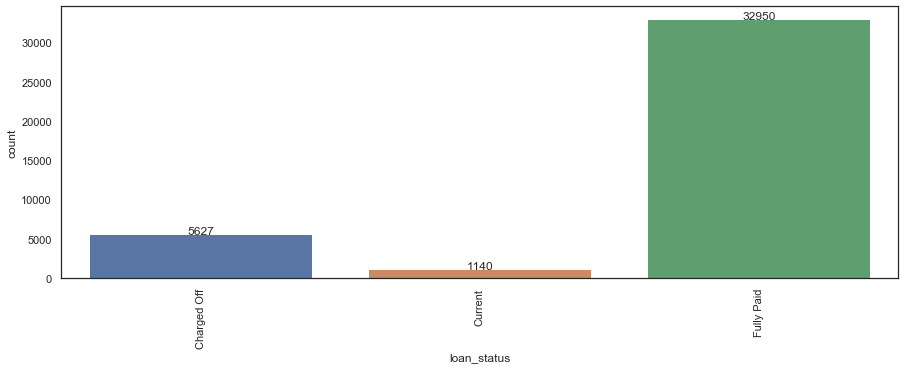

In [120]:
plt.figure(figsize=(15,5))
graph=sns.countplot(loan_df['loan_status'], order=sorted(loan_df['loan_status'].unique()))
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

### Analysis
 Charged off loans counts for 13% of total loans which is significantly high value.


In [121]:
def continous_plot(colNm,loan_df):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(loan_df[colNm])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=colNm, y="loan_status", data=loan_df)
    plt.show()

#### Loan amount

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


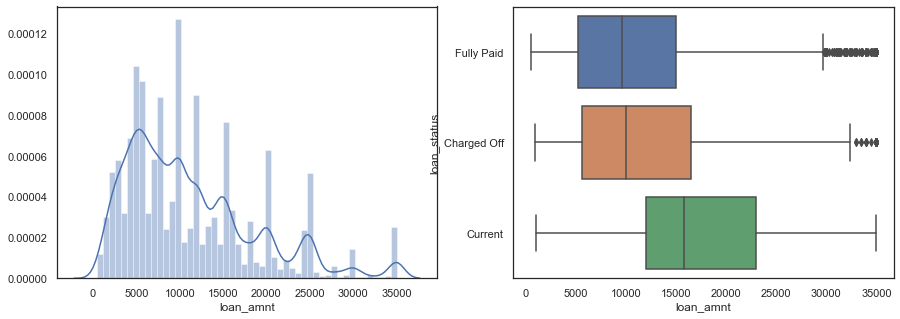

In [122]:
continous_plot('loan_amnt',loan_df)

### Analysis
1) Most loan amounts are at 5000 and 10000 dollar value.<br>
2) Charged off loans have slightly higher loan amount value than Fully paid loans


#### Anuual Income

In [123]:
# Removing outliers in annual_inc

scipy.stats.zscore(loan_df['annual_inc'])
zscore_annual_inc = np.abs(scipy.stats.zscore(loan_df['annual_inc']))
loan_df = loan_df.iloc[np.where(zscore_annual_inc<3)]
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,...,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,39428.000,38738.000
mean,683175.976,850514.591,11158.585,10889.593,10342.490,12.010,322.738,66025.262,13.365,0.146,...,50.817,12080.140,11496.952,9736.013,2247.898,1.360,94.870,12.232,2659.938,0.043
std,210713.538,265713.786,7399.703,7131.845,7073.066,3.720,206.943,36433.688,6.664,0.491,...,372.711,8964.487,8864.479,7006.429,2585.800,7.279,685.955,146.512,4415.501,0.205
min,54734.000,70699.000,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,516311.250,666931.750,5500.000,5343.750,5000.000,9.250,166.500,40000.000,8.250,0.000,...,0.000,5566.915,5094.802,4542.100,659.898,0.000,0.000,0.000,217.947,0.000
50%,665776.000,850909.000,10000.000,9600.000,8925.000,11.830,279.330,58500.000,13.460,0.000,...,0.000,9849.631,9253.780,8000.000,1342.200,0.000,0.000,0.000,542.400,0.000
75%,837697.750,1047319.500,15000.000,15000.000,14300.000,14.540,427.165,81500.000,18.630,0.000,...,0.000,16450.799,15706.788,13500.000,2812.403,0.000,0.000,0.000,3271.028,0.000
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,24.590,1305.190,260000.000,29.990,11.000,...,6307.370,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,2.000


C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


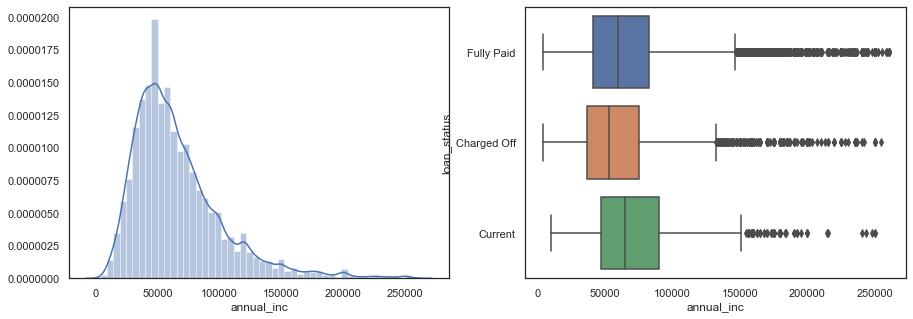

In [124]:
continous_plot('annual_inc',loan_df)

### Analysis
1) Most people have annual income around 50K.<br>
2) People with higher annual income tend to pay load fully .

#### Interest Rates

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


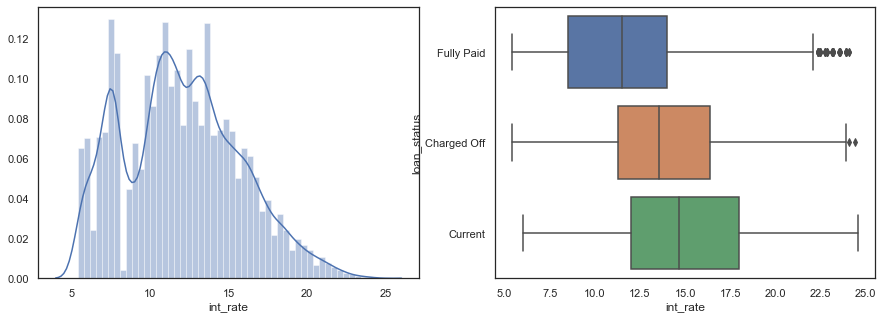

In [125]:
continous_plot('int_rate',loan_df)

### Analysis
1) Loans with higher interest rates have higher chance of being charged off .

#### DTI - ratio of total monthly debt to total monthly income

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


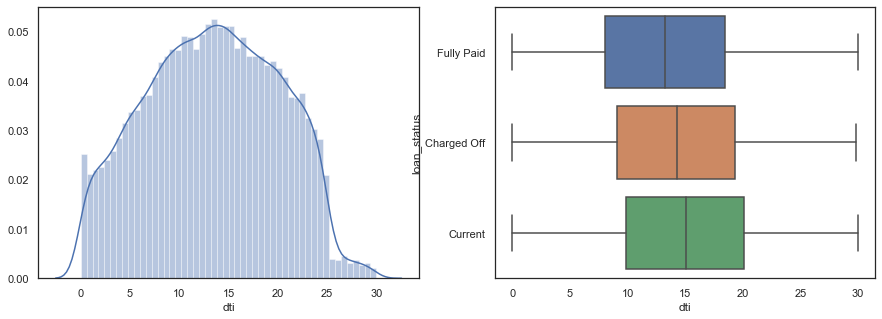

In [126]:
continous_plot('dti',loan_df)

### Analysis
1) Most individual have dti ration around 15<br>
2) Loans of individual with high DTI value have higher chance of being charged off .

#### Installment value

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


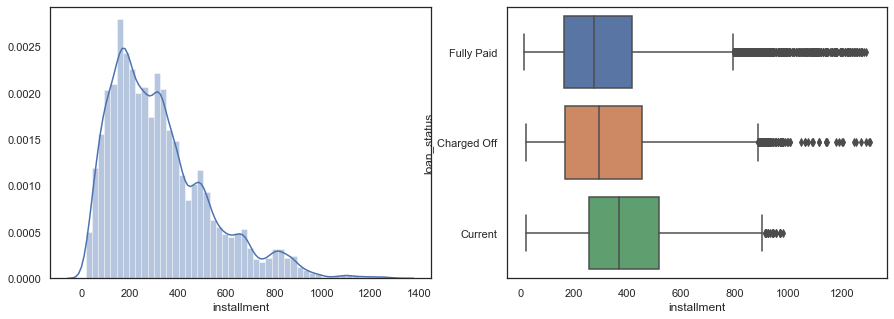

In [127]:
continous_plot('installment',loan_df)

### Analysis
1) Most individual have installment value around 200<br>
2) Loans of individual with high installment value have slighty higher chance of being charged off .

In [128]:
def category_plot(colNm,loan_df,length,breadth):
    col_status=loan_df.groupby([colNm])['loan_status'].value_counts()
    col_status_co=col_status.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).loc[:,'Charged Off']
    plt.figure(figsize=(length,breadth))
    plt.subplot(1, 2, 1)
    sns.countplot(loan_df[colNm], order=sorted(loan_df[colNm].unique()))
    plt.subplot(1, 2, 2)
    sns.barplot(x=col_status_co.index, y=col_status_co.values)
    plt.show()

#### Sub Grade 

Taking sub grade as varible instead of grade as it give much finer analysis.

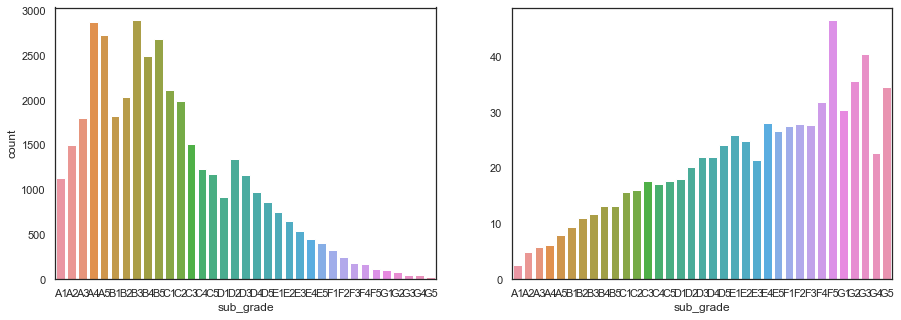

In [129]:
category_plot('sub_grade',loan_df,15,5)


### Analysis
1) Most loans are given at higher grades than at lower grades<br>
2) The risk of becoming charged off loan is much higher as the sub grade decreases.

#### Employee length

In [130]:

loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [131]:
# Standardizing Emp_length
loan_df['emp_length'] = loan_df['emp_length'].replace(np.nan, '0 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('< 1 year', '0 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('1 year', '1 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('10+ years', '10 years')

loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: int(x.replace(' years', '')))

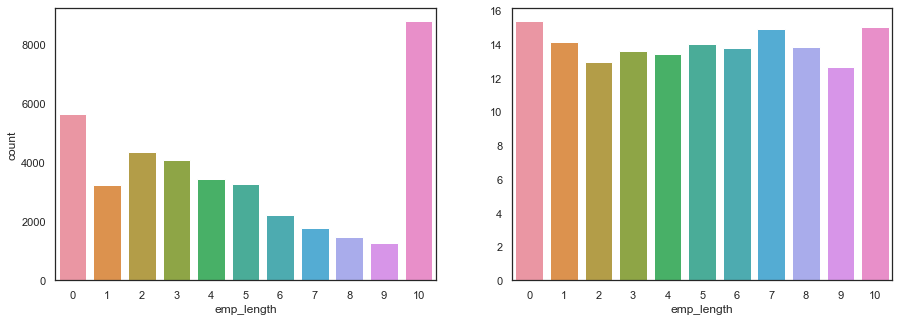

In [132]:
category_plot('emp_length',loan_df,15,5)

### Analysis
1) Most loans ar taken by employess having more than 10 years experience<br>
2) The years of experience doesnt seem to have significant influence on charge off loan percentage.

### Home Ownership

In [133]:
#Home Ownership
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [134]:
loan_df=loan_df[(loan_df['home_ownership']!='NONE')]
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

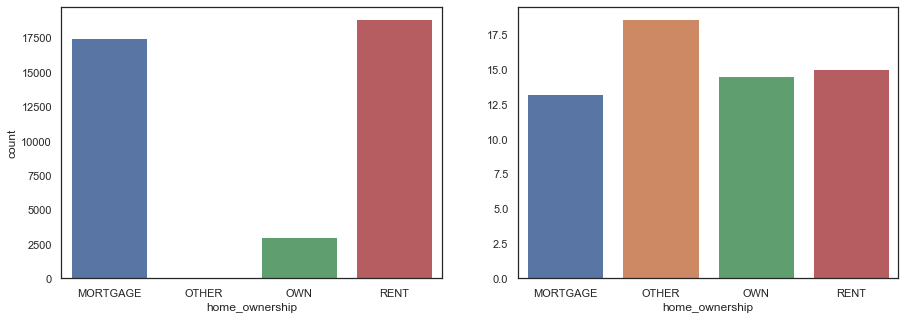

In [135]:
category_plot('home_ownership',loan_df,15,5)

### Analysis
1) Count of Individuals who either rent or take a mortgage is much higher than those who own<br>
2) The chances of loan becoming charged off is slightly higer in those who rent than those who own or mortgage.

### Verification Status

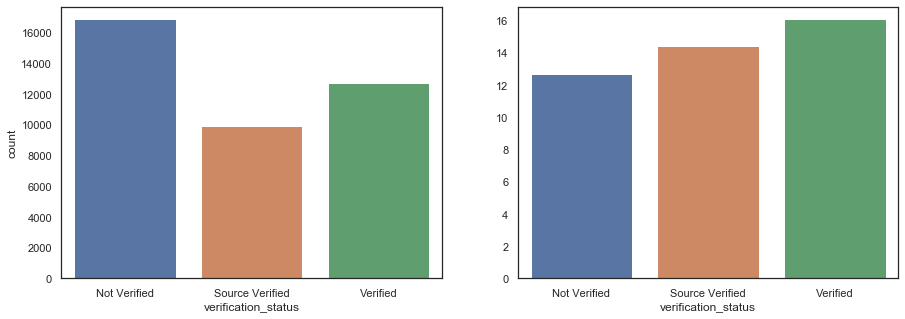

In [136]:
#verification_status
category_plot('verification_status',loan_df,15,5)

### Analysis
1) Most loans are not verified<br>
2) In contradiction to popular belief loans that are not verified have less chance of becoming charged off, however this could be because loans with high value need verification.

In [137]:
loan_df['zip_code'].nunique()

823

### Address State

Taking State value instead of zipcode as zipcode contains too many unique values


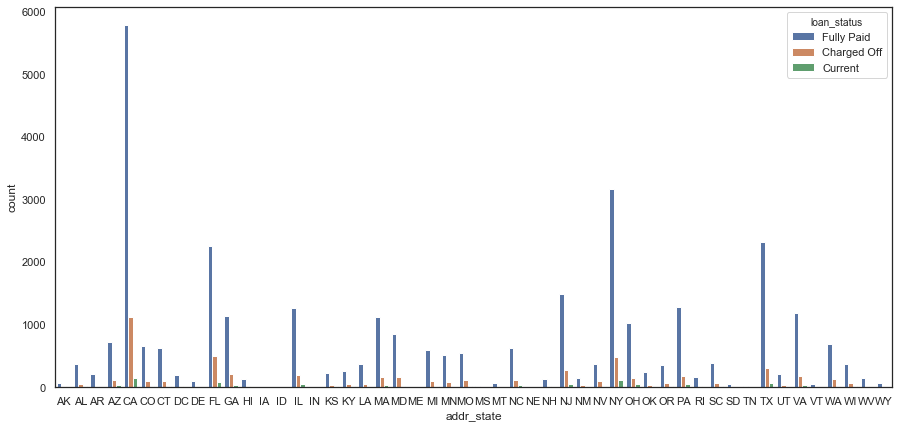

In [138]:
plt.figure(figsize=(15,7))

sns.countplot(loan_df['addr_state'],  hue = 'loan_status', data = loan_df ,order=sorted(loan_df['addr_state'].unique()))

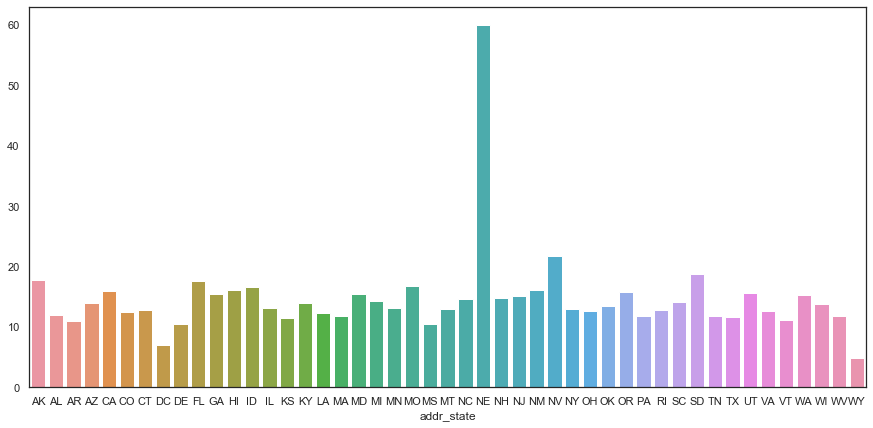

In [139]:
plt.figure(figsize=(15,7))

as_status=loan_df.groupby(['addr_state'])['loan_status'].value_counts()

as_status_co=as_status.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).loc[:,'Charged Off']
sns.barplot(x=as_status_co.index, y=as_status_co.values)


### Analysis
1) State CA has highest number of loans<br>
2) Event though state NE has high percentage of charged off loans , the value of toal loans is very insignificant to conclude anything meaning ful.


### Earliest credit line - The month the borrower's earliest reported credit line was opened

In [140]:
#earliest_cr_line
# loan_df['earliest_cr_line'].nunique()
# loan_df['earliest_cr_line'].isnull().any()

loan_df['earliest_cr_line_year']=loan_df['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y').year)
now = datetime.now()


#Standerdizing values

loan_df['earliest_cr_line_year']=loan_df['earliest_cr_line_year'].apply(lambda x: x if x<=now.year else x - 100)
#loan_df['earliest_cr_line_year'].nunique()
loan_df['earliest_cr_line_year'].describe()

count   39425.000
mean     1996.592
std         6.817
min      1946.000
25%      1993.000
50%      1998.000
75%      2001.000
max      2008.000
Name: earliest_cr_line_year, dtype: float64

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


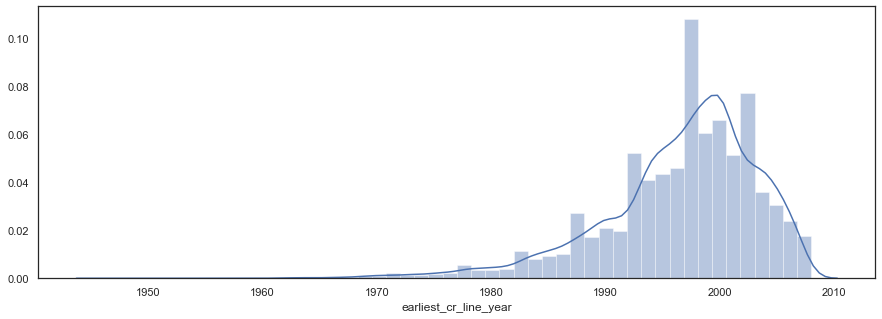

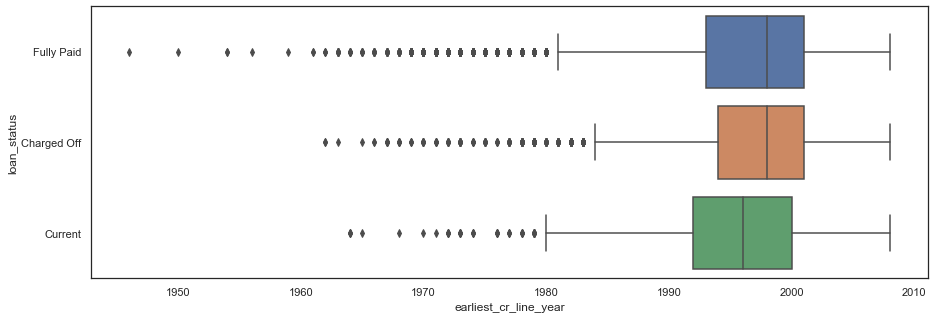

In [141]:
#category_plot('earliest_cr_line_year',loan_df,30,5,True)
plt.figure(figsize=(15,5))
sns.distplot(loan_df['earliest_cr_line_year'])
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(x="earliest_cr_line_year", y="loan_status", data=loan_df)
plt.show()

### Analysis
1) Most credit line are opened in year little prior to 2000.<br>
2) Cannot meaning fully decude information from earliest cr line.

### Inquiry last 6mths - The number of inquiries in past 6 months

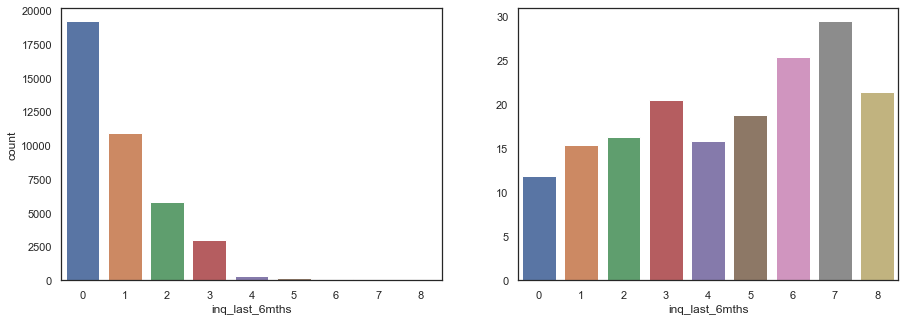

In [142]:
#inq_last_6mths
#loan_df['inq_last_6mths'].describe()
category_plot('inq_last_6mths',loan_df,15,5)

### Analysis
1) Most people donot make any Inquiries.<br>
2) More inquires might signal chances of chargeoff.

### Open Account 

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


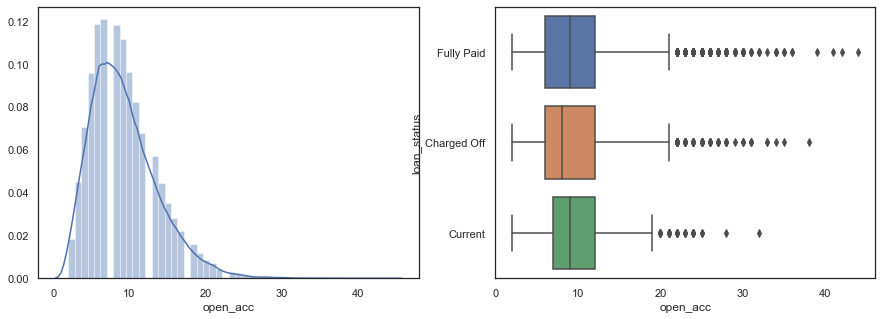

In [143]:
#open_acc
continous_plot('open_acc',loan_df)

### Analysis
1) Most people have around 10 open acc.<br>
2) Open acc does not significantly effect charge off percentage.

### Revol_Util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [32]:
# more holistic value than revol balance

In [144]:
#Datacleaning and standerdizing 
#revol_util
loan_df['revol_util']=loan_df['revol_util'].astype('str')

loan_df['revol_util']=loan_df['revol_util'].apply(lambda x: float(x.rstrip('%')))
loan_df=loan_df[(loan_df['revol_util'].notnull())]
#loan_df['revol_util']

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


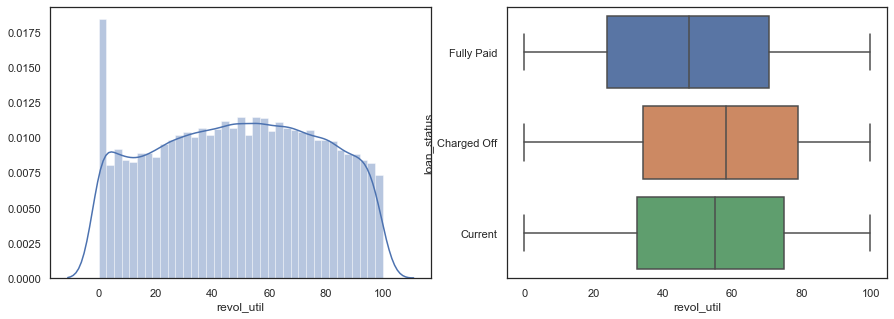

In [145]:
continous_plot('revol_util',loan_df)
# plt.figure(figsize=(15,5))
# plt.subplot(1, 2, 1)
# ax = sns.distplot(loan_df['revol_util'])
# plt.subplot(1, 2, 2)
# sns.boxplot(x="revol_util", y="loan_status", data=loan_df)
# plt.show()

### Analysis
1) Revol_util is uniformly distributed.<br>
2) Higher revol_util signals higher chance of charge off.

### pub_rec_bankruptcies

In [146]:
loan_df['pub_rec_bankruptcies'].describe()
loan_df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [147]:
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

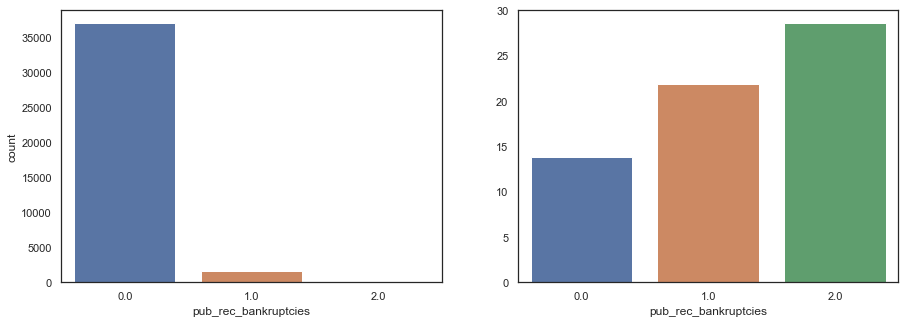

In [148]:
category_plot('pub_rec_bankruptcies',loan_df,15,5)

### Analysis
1) Higher number of bankruptcies of an individual could lead to more chance of charged off loans .

### Correlations between important variables


# Derived Metrics

### Creating buckets for Loan Amount, Annual Income, Interest Rates, Employee Experience,Issue month and year

In [149]:
##Creating buckets for loan amount
buckets = [0, 5000, 10000, 15000, 20000,35000]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000','20000 and above']
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], buckets, labels=labels)

##Creating buckets for annual income
buckets = [0, 25000, 50000, 75000, 100000,1000000]
labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_df['annual_inc_range'] = pd.cut(loan_df['annual_inc'], buckets, labels=labels)

##Creating buckets for interest rate
buckets = [5, 10, 15, 20,25, 35]
labels = ['5-10', '10-15', '15-20', '20-25','>25']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], buckets, labels=labels)


In [150]:
##Creating buckets for employment length and mapping them according to experience
loan_df['issue_month'] = loan_df['issue_d'].apply(lambda x: x.split('-')[0])
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x: x.split('-')[1])
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan_df['issue_month'] = pd.Categorical(loan_df['issue_month'],categories=months_order, ordered=True)

In [151]:
##Creating buckets for employment length and mapping them according to experience
buckets = [0, 2, 5, 10]
labels = ['0-2', '2-5', '5-10']
loan_df['emp_length'] = pd.cut(loan_df['emp_length'], buckets, labels=labels, include_lowest=True)
d = {'0-2': 'Fresher', '2-5': 'Experienced', '5-10': 'Senior'}
loan_df['emp_level'] = loan_df['emp_length'].map(d)

In [152]:

loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
loan_df_charged_off = loan_df[loan_df['loan_status'].isin([ 'Charged Off'])]


# Bi-Variate Analysis

### Interest Rate Range vs Loan Amount

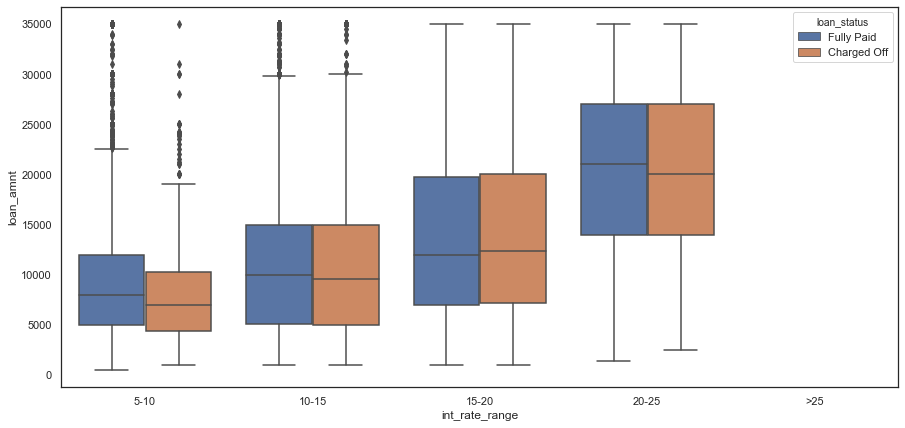

In [153]:
plt.figure(figsize=(15,7))
sns.boxplot(x='int_rate_range',y='loan_amnt', hue = 'loan_status',data = loan_df)
plt.show()

### verification Status vs Loan Amount vs loan status

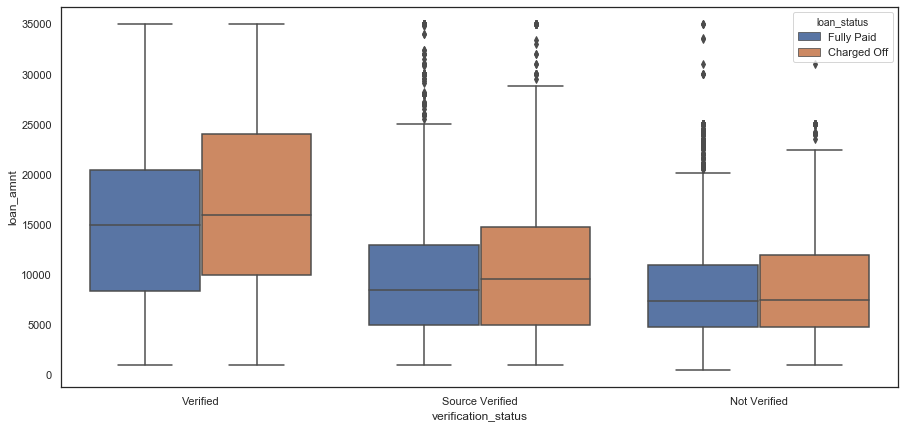

In [154]:
plt.figure(figsize=(15,7))
sns.boxplot(x='verification_status',y='loan_amnt', hue = 'loan_status',data = loan_df)
plt.show()

### #### Analysis

1) Above Graph gives an int_rate ranges and loan amounts for various charged off and fully paid are directly proportional and it tells that as the loan amount increases the int_rates increases.

2) The Repayment of loans is less in the case of those with interest range of 15-20

## Annual Income vs loan amount 

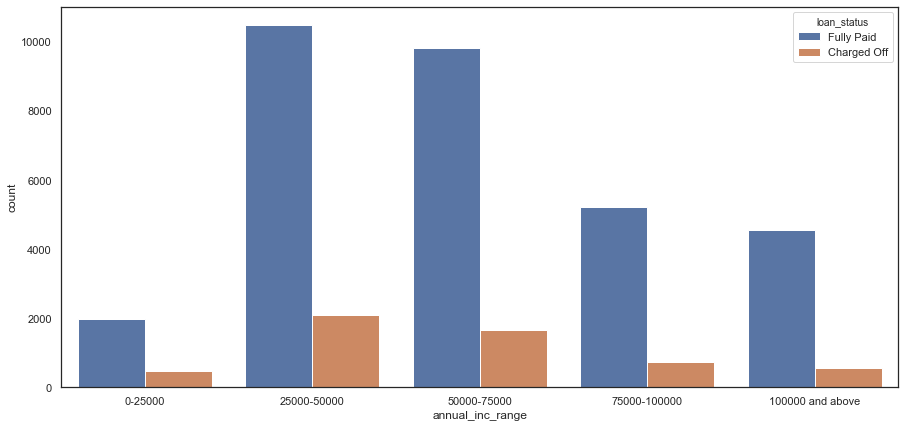

In [155]:
plt.figure(figsize=(15,7))
sns.countplot(x='annual_inc_range', hue = 'loan_status',data = loan_df)
plt.show()

### Analysis

From the above graph,the population of records who have 25000-75000 income range account to most amount of loan defaults

### annual inc range vs loan amount for charged off loans

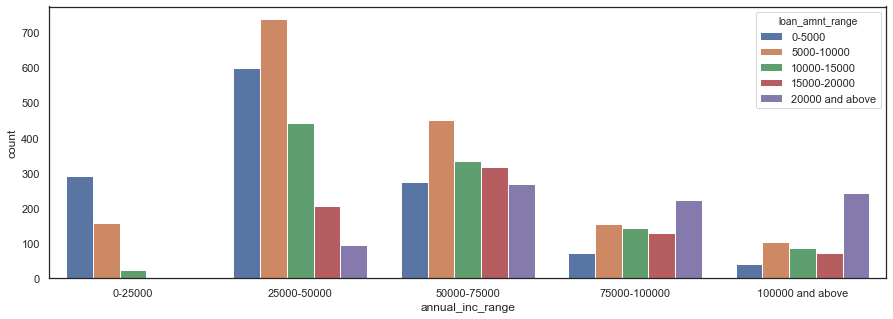

In [156]:
plt.figure(figsize=(15,5))
sns.countplot(x='annual_inc_range', hue = 'loan_amnt_range',data = loan_df_charged_off)
plt.show()

In [157]:
loan_amnt_annual_df = loan_df_charged_off.groupby(['annual_inc_range'])['loan_amnt'].sum().sort_values()
loan_amnt_annual_df

annual_inc_range
0-25000              2357450
100000 and above    10337125
75000-100000        11945525
25000-50000         19486600
50000-75000         21858650
Name: loan_amnt, dtype: int64

In [158]:
loan_amnt_annual_df_count = loan_df_charged_off.groupby(['annual_inc_range'])['loan_amnt'].count().sort_values()
loan_amnt_annual_df_count

annual_inc_range
0-25000              472
100000 and above     546
75000-100000         720
50000-75000         1647
25000-50000         2080
Name: loan_amnt, dtype: int64

####  Analysis

On Analysis of annual income ranges and loan amounts of various people ones with the annual income range of 25000-50000 are found to have the maximum number of defaulters and in the range of 50000-75000 maximum loan amount being defaulted

## debt to income ratio vs annual income of charged off loans

C:\Users\reddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


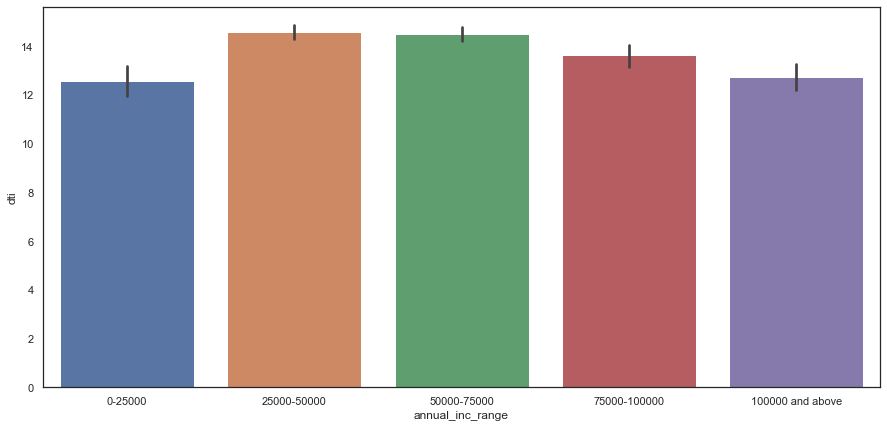

In [159]:
plt.figure(figsize=(15,7))
sns.barplot(y='dti',x='annual_inc_range',data = loan_df_charged_off)
plt.show()

# Analysis

 As per the above graph,dti is high for group of people with income in the range of 25000-75000, and hence we can consider that annual income in this range it can be risky.

In [160]:
loan_grade_ir_df = loan_df_charged_off.groupby(['grade'])['int_rate'].count()
loan_purpose_ir_df = loan_df_charged_off.groupby(['purpose'])['int_rate_range'].count()
loan_pur_loanamnt_df = loan_df_charged_off.groupby(['purpose'])['loan_amnt'].sum()
loan_pur_annualinc_df = loan_df_charged_off.groupby(['purpose','annual_inc_range'])['id'].sum()
loan_pur_annualinc_df_count = loan_df_charged_off.groupby(['purpose','annual_inc_range'])['id']
loan_addr_state_purpose = loan_df_charged_off.groupby(['addr_state'])['purpose'].count().sort_values()

## annual income vs purpose of charged off loans

In [161]:
loan_pur_annualinc_df

purpose             annual_inc_range
car                 0-25000              10883390
                    25000-50000          48586997
                    50000-75000          28106289
                    75000-100000         14760287
                    100000 and above      7792672
credit_card         0-25000              21636393
                    25000-50000         157662154
                    50000-75000         112056230
                    75000-100000         55432643
                    100000 and above     37775457
debt_consolidation  0-25000             133359088
                    25000-50000         745918896
                    50000-75000         634196091
                    75000-100000        265163655
                    100000 and above    182839917
educational         0-25000               5330923
                    25000-50000           9083802
                    50000-75000           4453371
                    75000-100000          2103299
             

In [162]:
loan_pur_annualinc_df_count.describe()

count       mean        std        min  \
purpose            annual_inc_range                                             
car                0-25000            17.000 640199.412 180337.900 362098.000   
                   25000-50000        68.000 714514.662 199371.530 349789.000   
                   50000-75000        39.000 720674.077 217703.847 356798.000   
                   75000-100000       22.000 670922.136 155518.851 393852.000   
                   100000 and above   10.000 779267.200 142347.209 523776.000   
credit_card        0-25000            31.000 697948.161 240123.760 303752.000   
                   25000-50000       211.000 747214.000 215361.172 331141.000   
                   50000-75000       156.000 718309.167 229963.421 287875.000   
                   75000-100000       76.000 729376.882 232692.141 300218.000   
                   100000 and above   57.000 662727.316 209721.751 296386.000   
debt_consolidation 0-25000           197.000 676949.685 197901.460 351053.000   
                   25000-50000      1028.000 725602.039 210298.608  61419.000   
                   50000-75000       863.000 734873.802 201283.443 292921.000   
                   75000-100000      359.000 738617.423 210188.901 303520.000   
                   100000 and above  254.000 719842.193 191856.829 349067.000   
educational        0-25000            12.000 444243.583  53322.715 361374.000   
                   25000-50000        20.000 454190.100  80979.182 296068.000   
                   50000-75000        10.000 445337.100  61956.584 358372.000   
                   75000-100000        5.000 420659.800  35479.387 361849.000   
                   100000 and above    6.000 406648.333  86196.025 300174.000   
home_improvement   0-25000            12.000 588418.583 125463.028 375804.000   
                   25000-50000       100.000 689498.280 186240.063 324626.000   
                   50000-75000       109.000 708618.523 194445.864 350153.000   
                   75000-100000       62.000 665638.597 200670.473 351801.000   
                   100000 and above   46.000 739770.500 183343.950 449978.000   
house              0-25000             2.000 701508.500  28293.464 681502.000   
                   25000-50000        23.000 635721.435 206805.942 392748.000   
                   50000-75000        13.000 674981.923 211306.555 455671.000   
                   75000-100000        8.000 719485.375 254375.395 370893.000   
                   100000 and above   11.000 776798.636 219280.041 424298.000   
...                                      ...        ...        ...        ...   
moving             0-25000            16.000 681556.500 146772.085 433832.000   
                   25000-50000        44.000 753323.818 156395.753 428179.000   
                   50000-75000        15.000 796139.933 219541.780 375517.000   
                   75000-100000        9.000 621174.111 158230.108 426198.000   
                   100000 and above    4.000 758622.000 180874.070 495236.000   
other              0-25000            94.000 658754.000 218889.836 365044.000   
                   25000-50000       243.000 691730.317 208377.097 307533.000   
                   50000-75000       149.000 699545.584 203746.793 283707.000   
                   75000-100000       60.000 685951.017 226804.204 298280.000   
                   100000 and above   66.000 691405.515 214332.505 309059.000   
renewable_energy   0-25000             3.000 772480.667 216120.676 600073.000   
                   25000-50000         8.000 642299.000  97116.176 511137.000   
                   50000-75000         3.000 668934.333 181118.659 530659.000   
                   75000-100000        3.000 753600.000 224340.612 564234.000   
                   100000 and above    2.000 676299.500 130157.852 584264.000   
small_business     0-25000            29.000 669174.690 172691.105 385670.000   
                   25000-50000       148.000 687830.243 191613.003 367

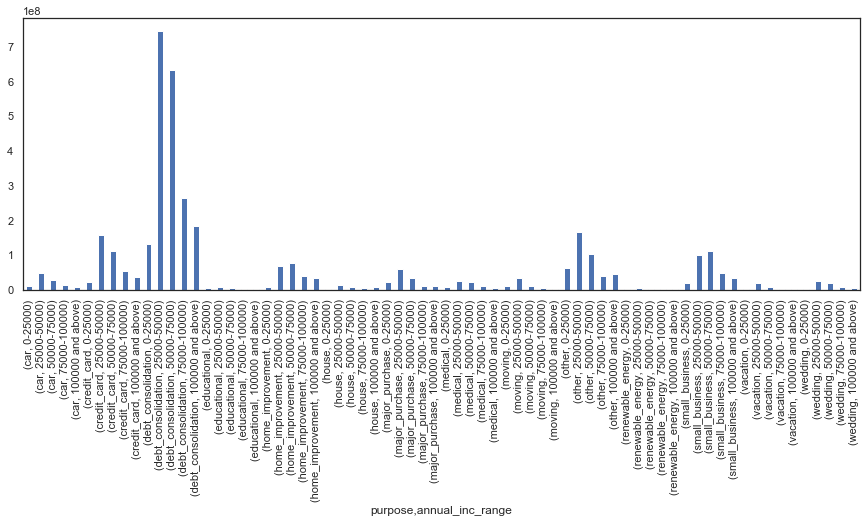

In [163]:
plt.figure(figsize=(15,5))
loan_pur_annualinc_df.plot.bar(x='annual_inc_range',y='purpose')

### Analysis

From the above it is clear that on grouping annual income range of 25000 to 75000 with purposes of debt consolidation,small business and others have higher chances of defaulting

## loan amount vs purpose

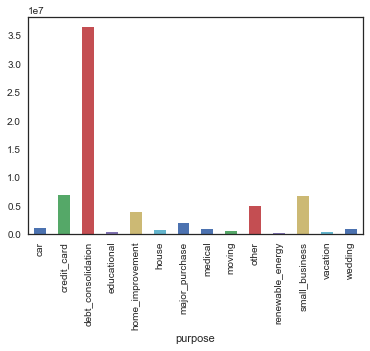

In [55]:
loan_pur_loanamnt_df.plot.bar()

In [56]:
loan_pur_loanamnt_df.reset_index()

,purpose,loan_amnt
0,car,1145050
1,credit_card,6887000
2,debt_consolidation,36471475
3,educational,426200
4,home_improvement,3881400
5,house,702775
6,major_purchase,1928975
7,medical,886250
8,moving,519900
9,other,5042775


### Analysis

From the above data of purpose and loan amount its clear that people with purpose of debt consolidation are the ones with highest loan amount being charged off and also the one's with higher percentage of people who have been waived off

## Sub-Grade vs Annual Income of charged off loans

In [57]:
loan_grade_ir_df = loan_df_charged_off.groupby(['sub_grade','annual_inc_range'])['loan_amnt'].count()
loan_grade_ir_df_sum = loan_df_charged_off.groupby(['sub_grade','annual_inc_range'])['loan_amnt'].sum()
loan_grade_ir_df_desc = loan_df_charged_off.groupby(['sub_grade','annual_inc_range'])['loan_amnt']
loan_grade_ir_df_desc.describe()

count      mean       std       min       25%  \
sub_grade annual_inc_range                                                  
A1        0-25000           3.000  4166.667  2929.733  2000.000  2500.000   
          25000-50000      13.000  7592.308  4084.529  1550.000  4325.000   
          50000-75000      11.000  7500.000  5366.563  1500.000  4000.000   
          75000-100000      3.000  7666.667  1154.701  7000.000  7000.000   
A2        0-25000           7.000  3689.286  1618.246  2000.000  2575.000   
          25000-50000      43.000  6719.186  2913.402  1000.000  4750.000   
          50000-75000      19.000  8685.526  6382.035  2000.000  4562.500   
          75000-100000      3.000  4566.667  2676.440  1700.000  3350.000   
          100000 and above  1.000  6125.000       nan  6125.000  6125.000   
A3        0-25000          10.000  4310.000  2643.420  1500.000  2425.000   
          25000-50000      44.000  6764.205  4102.022  1300.000  3212.500   
          50000-75000      26.000  7984.615  3008.713  2000.000  5500.000   
          75000-100000     12.000  9268.750  7408.235  2300.000  4750.000   
          100000 and above  8.000 14562.500  7798.523  4000.000 10000.000   
A4        0-25000          17.000  4444.118  2840.053  1200.000  2200.000   
          25000-50000      80.000  7048.125  4629.073  1000.000  3425.000   
          50000-75000      51.000  9035.784  4984.424  1000.000  5000.000   
          75000-100000     17.000  9182.353  5235.007  2700.000  5900.000   
          100000 and above 12.000 13110.417  9459.552  2500.000  7400.000   
A5        0-25000          33.000  5430.303  2676.392  1000.000  3000.000   
          25000-50000      95.000  7138.158  3954.333  1400.000  4500.000   
          50000-75000      49.000  9448.469  5178.035  1200.000  5000.000   
          75000-100000     25.000 10946.000  4554.026  4000.000  9000.000   
          100000 and above 14.000 10923.214  6387.807  2500.000  7000.000   
B1        0-25000          22.000  6025.000  3736.428  1500.000  2625.000   
          25000-50000      68.000  7951.103  4640.273  1200.000  4950.000   
          50000-75000      47.000  9811.702  5721.280  1800.000  6250.000   
          75000-100000     17.000 12379.412  4741.013  2100.000  8000.000   
          100000 and above 11.000 13895.455  6383.982  2100.000 10000.000   
B2        0-25000          24.000  4938.542  3103.749  1000.000  2000.000   
...                           ...       ...       ...       ...       ...   
F4        75000-100000      9.000 24216.667  5611.150 16000.000 20950.000   
          100000 and above 13.000 28907.692  4734.001 24000.000 25000.000   
F5        0-25000           2.000  4900.000  2969.848  2800.000  3850.000   
          25000-50000       8.000 11475.000  7426.545  4800.000  5000.000   
          50000-75000      25.000 19467.000  7730.812  6000.000 15000.000   
          75000-100000     11.000 27281.818  5401.957 18000.000 25000.000   
          100000 and above  6.000 28500.000  7842.194 16000.000 25000.000   
G1        0-25000           3.000  7900.000  3119.295  6000.000  6100.000   
          25000-50000       6.000 12854.167  3070.440  7000.000 12500.000   
          50000-75000       8.000 14568.750  7295.641  4800.000 10887.500   
          75000-100000      7.000 25285.714  5581.944 18000.000 22500.000   
          100000 and above  6.000 29666.667  7788.881 15000.000 28500.000   
G2        0-25000           1.000  8500.000       nan  8500.000  8500.000   
          25000-50000       7.000 13285.714  5255.034  5000.000 11687.500   
          50000-75000       8.000 18743.750  6570.358  5000.000 17612.500   
          75000-100000      5.000 17960.000  5357.985 10800.000 15000.000   
          100000 and above  5.000 31800.000  4868.265 24000.000 30000.000   
G3        25000-50000       5.000 11005.000  6321.995  4200.000  8000.000   
          50000-75000       7.000 22128.571  6711.859 10000.000 20250.000   
          75000-100000  

In [58]:
loan_grade_ir_df.reset_index()

,sub_grade,annual_inc_range,loan_amnt
0,A1,0-25000,3
1,A1,25000-50000,13
2,A1,50000-75000,11
3,A1,75000-100000,3
4,A2,0-25000,7
5,A2,25000-50000,43
6,A2,50000-75000,19
7,A2,75000-100000,3
8,A2,100000 and above,1
9,A3,0-25000,10


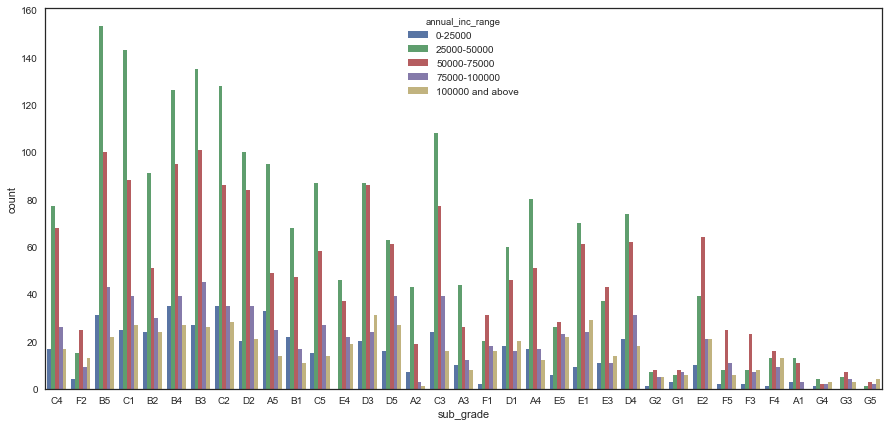

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x='sub_grade',hue='annual_inc_range',data = loan_df_charged_off)
plt.show()

###  Analysis

People with 25000-75000 income group with sub grades of B5,C1,B3,C2,C3 are the ones with high defaulter counts



### Open Acc vs Annual Income Range for charged off loans

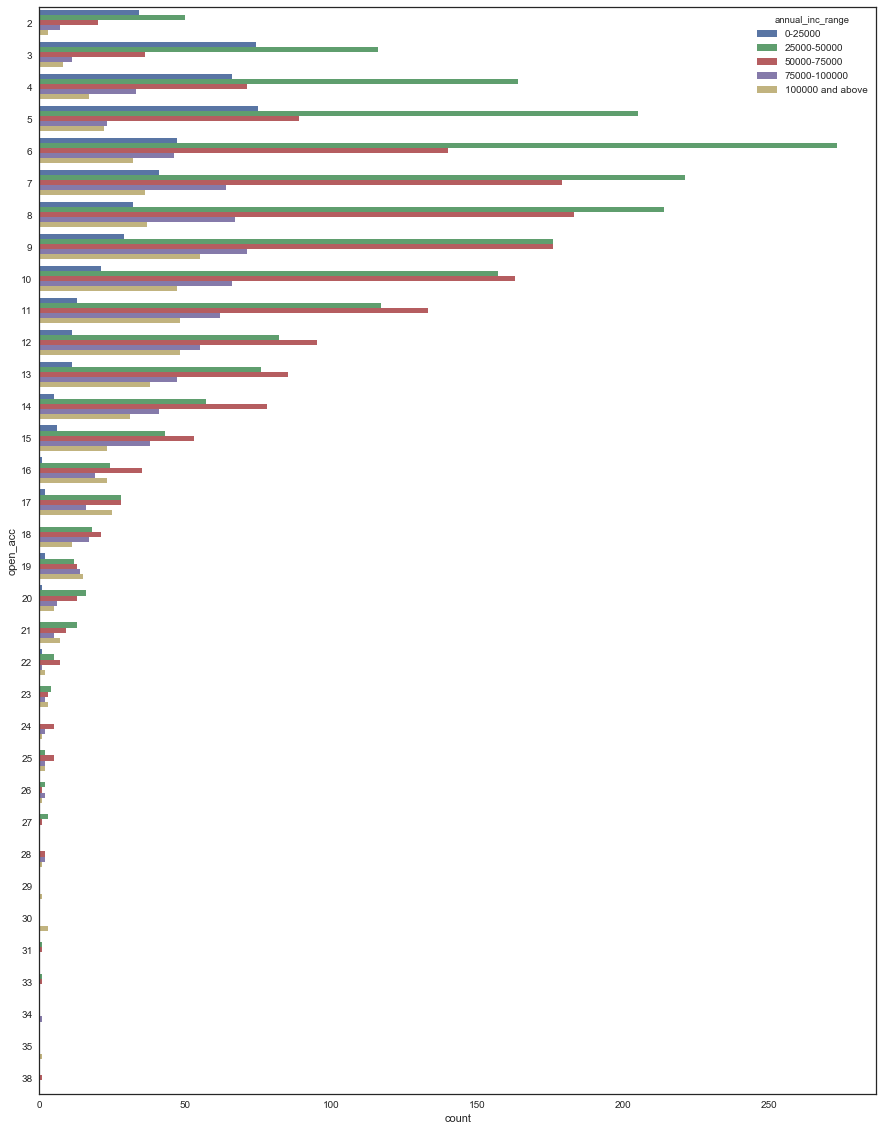

In [60]:
plt.figure(figsize=(15,20))
sns.countplot(y='open_acc',hue='annual_inc_range',data = loan_df_charged_off)
plt.show()

#### Analysis

As per the above graph we can see that people with open_acc values of 3 to 8 with income range of 25000 to 75000 have most number of defaulter

### verification Status vs Annual Income of Charged Off Loans

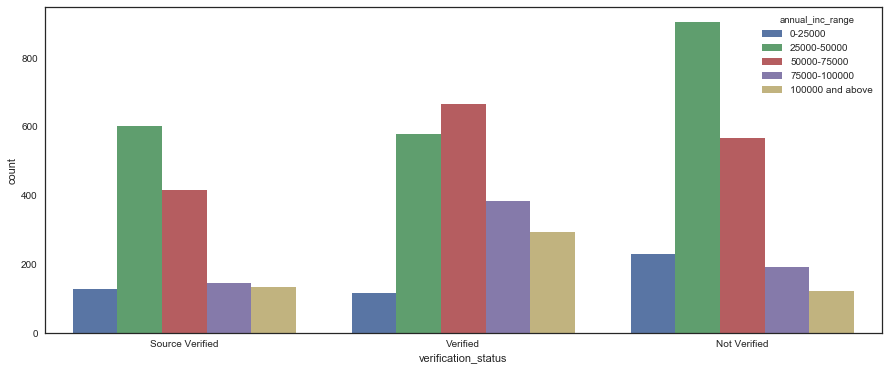

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(x='verification_status',hue='annual_inc_range',data = loan_df_charged_off)
plt.show()

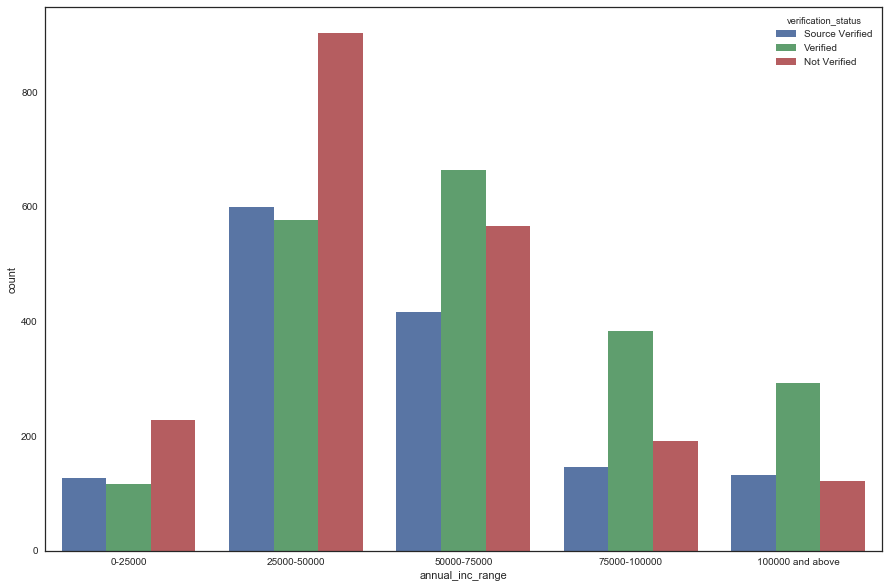

In [62]:
plt.figure(figsize=(15,10))
sns.countplot(x='annual_inc_range',hue='verification_status',data = loan_df_charged_off)
plt.show()

#### Analysis

As per the above plot we can see whatever is the verification status the people with 25000 to 75000 group are in higher number

### State vs Annual Income Range of Charged off Loans

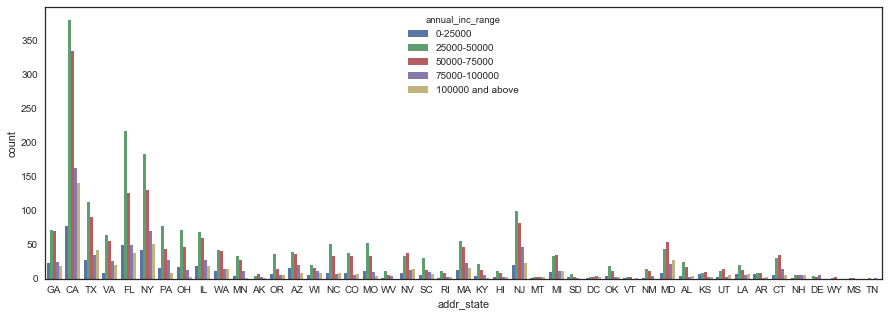

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(x='addr_state',hue='annual_inc_range',data = loan_df_charged_off)
plt.show()

#### Analysis

From the above we can understand that annual income ranges of 25000-75000 from states of CA,FL,NY,TX contribute to major amount of loan defaulters

# Correlation Matrix

In [165]:
loan_sig_var = loan_df[['loan_amnt','int_rate', 'installment','emp_length', 'annual_inc','dti', 'delinq_2yrs', 'earliest_cr_line',
'inq_last_6mths', 'open_acc', 'pub_rec',  'revol_util','pub_rec_bankruptcies','loan_status']]
loan_sig_var.corr()
#These variable are most important on analysis as others are either higly coorelated to these varibles or 

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,pub_rec_bankruptcies
loan_amnt,1.000,0.300,0.931,0.417,0.069,-0.035,0.009,0.175,-0.049,0.063,-0.035
int_rate,0.300,1.000,0.277,0.070,0.109,0.158,0.136,0.004,0.100,0.467,0.084
installment,0.931,0.277,1.000,0.416,0.059,-0.024,0.007,0.171,-0.044,0.093,-0.032
annual_inc,0.417,0.070,0.416,1.000,-0.114,0.029,0.042,0.258,-0.020,0.039,-0.020
dti,0.069,0.109,0.059,-0.114,1.000,-0.033,0.004,0.293,-0.006,0.278,0.005
delinq_2yrs,-0.035,0.158,-0.024,0.029,-0.033,1.000,0.008,0.013,0.009,-0.044,0.004
inq_last_6mths,0.009,0.136,0.007,0.042,0.004,0.008,1.000,0.094,0.024,-0.069,0.016
open_acc,0.175,0.004,0.171,0.258,0.293,0.013,0.094,1.000,0.002,-0.091,0.007
pub_rec,-0.049,0.100,-0.044,-0.020,-0.006,0.009,0.024,0.002,1.000,0.059,0.846
revol_util,0.063,0.467,0.093,0.039,0.278,-0.044,-0.069,-0.091,0.059,1.000,0.061


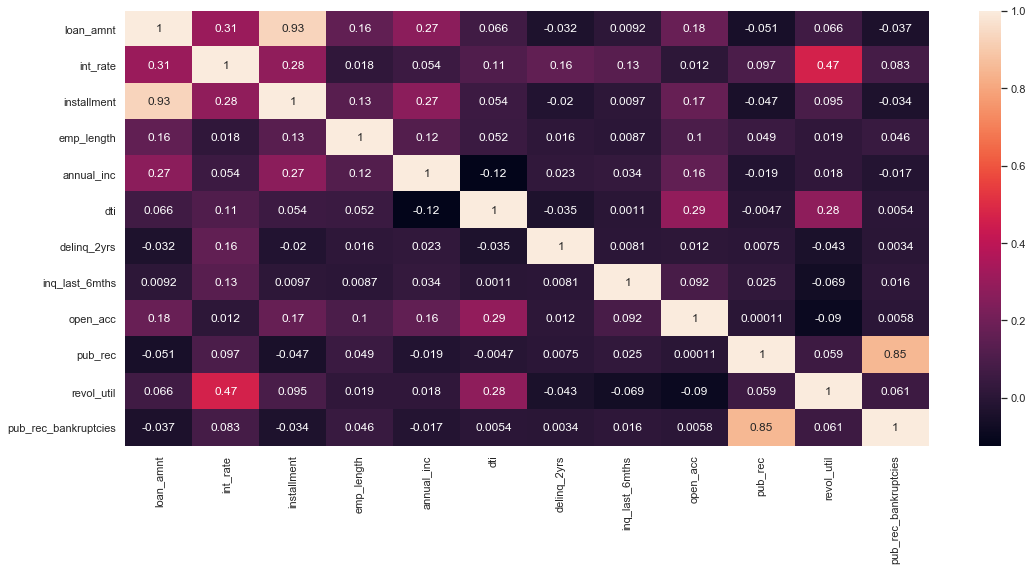

In [164]:
plt.figure(figsize=(18,8))
sns.heatmap(loan_sig_var.corr(method = 'pearson'),annot=True)

#### Analysis

1)As per the above plot we can clearly see that out of the significant variable effecting the loan_status variable except loan_amnt, Installment and pub_rec, pub_rec_bankruptcies all other variables are independently correlated so we are considering only loan_amnt and pub_rec_bankruptcies for our analysis.
2)revol_util and int_rate are coorelated which shows higer interest is charged for riskier loans.